<a href="https://colab.research.google.com/github/SupidchayaTangkidwanich/multivariate/blob/main/Multivariate_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ให้นักศึกษาทำข้อสอบใน Colab Notebook นี้โดยกรอกข้อมูลของตัวเองใน cell ที่ 2 แล้วรัน cell ที่ 1 - 5 และเริ่มทำข้อสอบใน cell ที่ 6 เป็นต้นไป

โดยโจทย์คือ
1. ข้อมูลโจทย์ อยู่ใน ตัวแปร ```Data```
2. ทำ clustering แล้วทำ visualize ข้อมูลแบบ 2 มิติ
3. ลด Dimension ของข้อมูลเหลือ 2 มิติ แล้วทำ clustering แล้ว visualize ข้อมูลแบบ 2 มิติ
4. เปรียบเทียบความแตกต่างของผลข้อ 2. กับ ข้อ 3.
5. เขียน comments อธิบายทุกขั้นตอน
6. อัด video อธิบาย code ทุกๆขั้นตอนรวมถึงผลแล้วอัพลง youtube ในรูปแบบ unlist 
7. commit โดยใช้ชื่อ commit เป็น link youtube ที่อธิบาย code ในข้อ 6.

กำหนดส่งวันที่ 2 พฤษภาคม 2564 (โดยให้มากรอกวันที่ commit ครั้งสุดท้ายใน sheet: https://docs.google.com/spreadsheets/d/1_qJwLDJVtOW1HxBcf_FHVc6UT4J_SOonuR6o3EEnVzw/edit?usp=sharing ช่อง Final)

In [2]:
from sklearn.datasets import make_blobs
import random,math
import numpy as np
import pandas

In [3]:
Name = 'สุพิชญา ตั้งกิจวานิชย์'
ID = '6230205420'

In [4]:
def DataGenerator(name,id):
    random.seed(int(id[3:6]))
    numfeat = random.randint(20,30)
    ct = random.randint(len(name)-6,len(name))
    
    X, y = make_blobs(n_samples=10000, centers=ct, n_features=numfeat , random_state=int(id[3:6]))

    print(f'{id[3:6]}:{numfeat}:{ct}')
    X_t = (X[:,1]*2)+int(id[3])
    X_t2 = (X[:,-1]*5)+int(id[4])

    DT = np.append(X,X_t.reshape([10000,1]),axis=1)
    DT = np.append(DT,X_t2.reshape([10000,1]),axis=1)
    
    return pandas.DataFrame(DT)

In [5]:
Data = DataGenerator(Name,ID)

020:30:22


In [6]:
Data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,-5.235210,-2.860860,-0.805871,-6.856979,-6.777006,-8.583028,7.259264,1.447058,-4.348699,-11.271009,3.188789,-3.706942,2.009193,1.570851,9.985383,2.633004,-0.269312,9.070029,7.393669,-8.279610,-7.588774,-0.331426,4.126808,0.896063,-6.202212,-2.145307,-9.459880,-6.749552,-7.682965,4.194720,-5.721721,22.973601
1,9.510645,-11.724693,-5.819783,-0.784435,4.213936,9.149353,7.801894,1.899180,-2.084421,-0.698642,6.422391,3.871113,4.632243,-0.403535,6.446859,5.793426,-5.205285,0.412460,5.175845,-9.418035,-9.259097,10.100478,7.104180,4.488556,7.110296,-5.801875,-8.563083,4.534392,-1.015977,6.009005,-23.449386,32.045023
2,9.768125,-9.505962,-5.533852,-1.030323,4.315569,10.896623,7.123481,2.266101,-1.416885,-2.166934,2.684397,4.669916,6.283261,-2.630425,10.382282,5.216370,-5.983786,1.917078,3.739032,-10.258786,-9.797286,9.477836,5.785408,4.343419,8.028847,-4.558729,-7.085180,3.283552,-0.202463,5.715904,-19.011924,30.579518
3,0.265184,-3.451455,-6.242929,11.222199,-1.053836,4.398465,-6.825062,4.595991,3.862471,4.729208,9.165959,6.151587,-0.823517,9.247155,-6.436628,3.884506,8.047165,2.184967,2.046106,8.087513,-1.901367,0.155482,-1.531668,5.135129,-8.600767,-7.648380,-7.757502,5.174454,-4.832281,2.099184,-6.902911,12.495921
4,-1.146704,-7.142143,1.101740,7.364864,-9.830379,-2.518818,-0.905386,-2.886974,-7.672461,-5.743728,9.156414,-5.083711,-11.229786,-1.163712,2.759683,-2.571018,8.121640,-4.834813,9.562179,-2.797196,7.536796,0.250696,-6.008766,-9.761062,8.361335,7.242344,4.432262,-1.469124,-1.062886,6.270803,-14.284285,33.354013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.468904,1.508715,-5.344932,-10.006272,4.791907,-0.434561,-2.514041,-0.196371,-5.284415,-3.984139,0.066370,3.120663,-3.187021,-1.873491,-4.708044,2.196728,-6.470265,2.258201,4.821559,-7.505703,3.943361,-2.060711,4.861821,6.092516,6.662436,1.913058,4.627481,2.277454,-2.579394,2.949088,3.017429,16.745438
9996,-3.648360,-10.778105,-4.391808,-9.771854,-2.643268,2.147130,-9.317066,-10.317206,1.935296,3.543057,-4.064741,-5.384925,1.282269,-1.254489,-7.606798,9.634642,9.467173,7.251492,-10.231833,-7.762669,-7.127021,1.845076,1.811317,5.178686,3.237937,6.232463,-8.661862,1.788290,4.374740,-4.792314,-21.556211,-21.961569
9997,8.435509,-6.554998,-8.754114,-4.359208,4.330762,-1.767436,-4.784996,-5.611044,8.741600,0.262239,7.516994,1.931891,-6.907949,8.729823,0.912568,-9.401059,0.683269,-4.586662,6.855340,-2.787098,-6.923734,9.168708,-6.908518,4.623331,5.178249,8.891360,-0.605690,-8.514347,-2.075814,-4.940532,-13.109996,-22.702661
9998,0.127080,4.501513,-3.334955,-3.516207,8.116519,-10.444870,-4.854239,-7.782008,-5.369580,3.583364,-7.395462,-1.538423,0.956582,-3.833582,-3.877565,2.837093,6.527495,-2.057050,-7.983029,6.432964,5.527862,-3.140381,1.553203,-0.265407,3.904482,-7.439079,-6.935518,8.433059,6.970092,-8.077428,9.003027,-38.387138


# clustering


ตรวจสอบขนาดของข้อมูลว่า มี data กี่ตัว เเละมีกี่ dimensions

In [ ]:
Data.shape # มีทั้งหมด 32 dimension

(10000, 32)

## เนื่องจาก Data มี dimension มากเกินไป เราจะทดสอบดูว่า column ใด ให้ข้อมูลซ้ำกับ column อื่น เเล้วลบมันออก

โดยจะเลือกเเต่ข้อมูลที่เป็นตัวเลข เเต่ข้อมูลนี้มีเเต่ตัวเลขอยู่เเล้วจึงไม่ต้องตัดออก

#### Kmean

##### Import

In [7]:
from sklearn.cluster import KMeans

##### Define

In [8]:
kmeans = KMeans(random_state=2021)

##### Fit - Transform

In [9]:
kmeans.fit(Data) # เเสดง จุด cluster centers ที่คำนวณออกมาได้

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=2021, tol=0.0001, verbose=0)

In [10]:
kmeans.cluster_centers_

array([[  1.71800027,  -6.21285349,  -1.12774587,   1.08655163,
          3.37243952,   3.04625098,  -3.35065459,  -1.61455118,
         -1.58375089,   2.1162272 ,   1.92544718,   1.29159736,
          2.1771463 ,   5.25350631,  -3.67140014,  -1.66639205,
          0.91935109,  -0.25174973,  -2.21661717,  -1.53858595,
         -0.9981979 ,  -0.70473828,  -1.35106356,  -1.07321597,
          0.08594281,   2.64674883,  -1.47108795,  -3.77812246,
         -2.71070997,  -6.22198749, -12.42570697, -29.10993746],
       [ -2.22293057,  -2.71369564,  -5.30166516,   8.69970758,
          3.54064169,  -3.79352741,   2.12936095,   3.19350558,
          5.28987227,   1.83380424,  -1.63631266,   1.26693807,
          0.17474392,  -0.53366663,  -6.72321254,   0.3708422 ,
          2.41148277,  -0.08176501,   3.03063704,  -1.94128075,
          0.51915599,  -4.28269633,  -2.09922295,  -1.2644428 ,
         -0.48565122,  -3.59826376,  -4.7600181 ,   2.23730764,
          5.26170295,   2.61897293,  -5

#### ทดสอบการจัดกลุ่มของ Data

In [11]:
y = kmeans.predict(Data)
y

array([2, 2, 2, ..., 0, 3, 1], dtype=int32)

## ทำ PCA เพื่อลด Dimension ของข้อมูลเนื่องจากมีจำนวน Dimension ที่เยอะเกินไป

###### Import

In [12]:
from sklearn.decomposition import PCA

##### Define

In [13]:
pca = PCA(n_components=2)

#####  Fit - Transform

In [14]:
new_pca = pca.fit_transform(Data)

In [15]:
new_pca.shape # จะเห็นว่า dimension เหลือเเค่ 2 dimension

(10000, 2)

In [16]:
from matplotlib import pyplot as plt

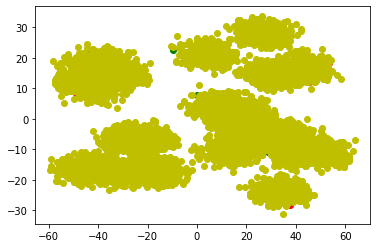

In [29]:
plt.plot(new_pca[:50,0],new_pca[:50,1],'or')
plt.plot(new_pca[50:100,0],new_pca[50:100,1],'og')
plt.plot(new_pca[100:,0],new_pca[100:,1],'oy')

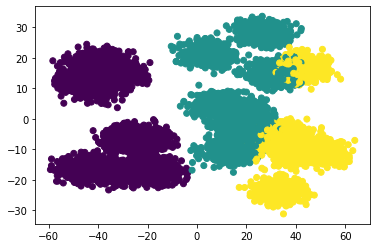

In [17]:
kmeans = KMeans(n_clusters=3,random_state=2021)
kmeans.fit(Data)
y = kmeans.predict(Data)
plt.scatter(new_pca[:,0],new_pca[:,1],c=y)

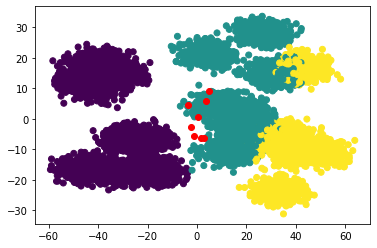

In [23]:

plt.scatter(new_pca[:,0],new_pca[:,1],c=y) # cluster center
plt.plot(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],'or')

หลังจากนั้น จะทำการหาค่า k ว่าควรจะเป็นเท่าไหร่ โดบการใช้ Elbow Method ในการช่วยหาค่า k ที่เหมาะสม


##### SSE (Sum of Squared Errors)
SSE คือ ความไม่ใกล้เคียงกับจุดศูนย์กลางมากน้อยเท่าไหน

In [18]:
kmeans.inertia_

11134453.960132588

In [19]:
SSE = list()
for k in [1,2,3,4,5,6,7,8]:
    kmeans = KMeans(n_clusters=k,random_state=2021)
    kmeans.fit(Data)
    SSE.append(kmeans.inertia_)

In [20]:
SSE

[21383197.695221562,
 12526383.352083936,
 11134453.960132588,
 9906995.413663898,
 9144006.591083162,
 8391396.655424077,
 7801784.776167525,
 7230682.0301326085]

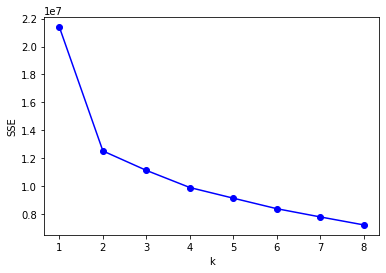

In [21]:
plt.plot([1,2,3,4,5,6,7,8],SSE,'o-b') 
plt.xlabel('k')
plt.ylabel('SSE');

## Silhouette coefficient 

In [25]:
from sklearn import metrics

In [26]:
SilH = list()
for k in [2,3,4,5,6,7,8]:
    kmeans = KMeans(n_clusters=k,random_state=2021)
    kmeans.fit(Data)
    score = metrics.silhouette_score(Data,kmeans.labels_)
    SilH.append(score)

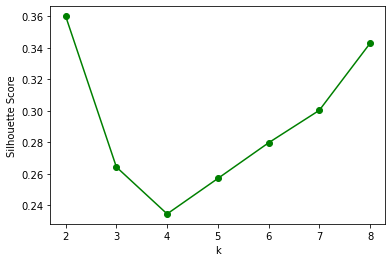

In [27]:
plt.plot([2,3,4,5,6,7,8],SilH,'o-g') # ทำการ Silhouette ดีที่สุดที่ คือ 2
plt.xlabel('k')
plt.ylabel('Silhouette Score');